In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

In [2]:
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")
train_data_dictionary= pd.read_csv("train_data_dictionary.csv")
sample_sub = pd.read_csv("sample_sub.csv")
train_data['is Train']=1
test_data['is Train']=0
train_data=train_data.append(test_data)

In [3]:
train_data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,is Train
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,1
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,1
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,1
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,1
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,NaN,0
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,NaN,0
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,NaN,0
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,NaN,0


In [4]:
label_encoder = preprocessing.LabelEncoder()
train_data['Age'] = label_encoder.fit_transform(train_data['Age'])
train_data['Severity of Illness'] = label_encoder.fit_transform(train_data['Severity of Illness'])
train_data['Type of Admission'] = label_encoder.fit_transform(train_data['Type of Admission'])
train_data['Ward_Type'] = label_encoder.fit_transform(train_data['Ward_Type'])
train_data['Department'] = label_encoder.fit_transform(train_data['Department'])
train_data['Hospital_type_code'] = label_encoder.fit_transform(train_data['Hospital_type_code'])
train_data['Hospital_region_code'] = label_encoder.fit_transform(train_data['Hospital_region_code'])
train_data['Ward_Facility_Code'] = label_encoder.fit_transform(train_data['Ward_Facility_Code'])

In [5]:
train_data['Bed Grade']=train_data['Bed Grade'].fillna(train_data['Bed Grade'].mean())
train_data['City_Code_Patient']=train_data['City_Code_Patient'].fillna(method='ffill')

<AxesSubplot:>

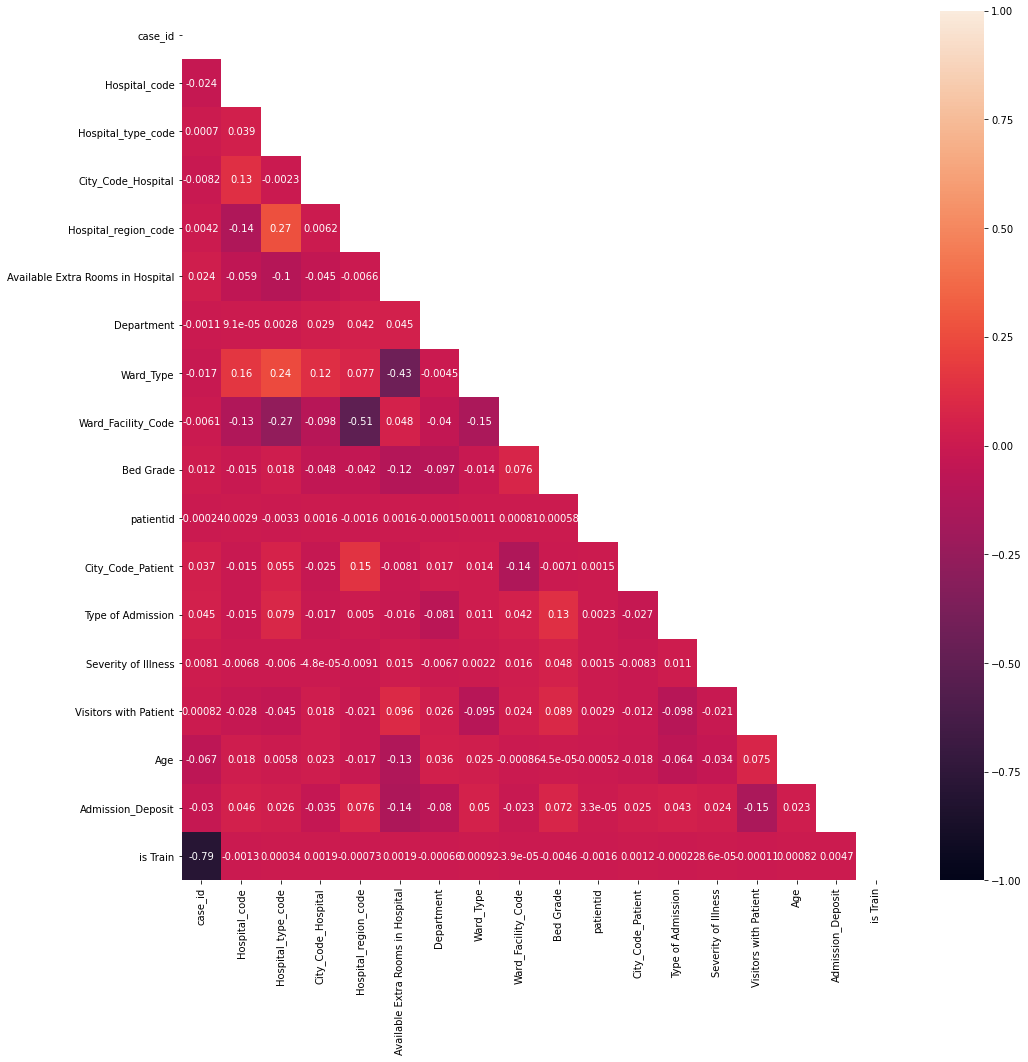

In [6]:
corr =train_data.corr()
plt.figure(figsize=(16,16))
mask_ut=np.triu(np.ones(corr.shape)).astype(np.bool)
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,mask=mask_ut)

In [7]:
x=pd.DataFrame(train_data[train_data['is Train']>0], columns=['Visitors with Patient','Bed Grade','Available Extra Rooms in Hospital','Department','Ward_Type','Type of Admission','Hospital_type_code','Hospital_region_code','Ward_Facility_Code']) 
y=train_data[train_data['is Train']>0]['Stay']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=69)

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL on train data: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL on train data:  0.3782188167315664


In [10]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL on train data: : ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL on train data: :  0.3983796005526944


In [11]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

Learning rate set to 0.10425
0:	learn: 2.2213151	total: 177ms	remaining: 2m 56s
1:	learn: 2.1045593	total: 276ms	remaining: 2m 17s
2:	learn: 2.0181469	total: 379ms	remaining: 2m 5s
3:	learn: 1.9507912	total: 496ms	remaining: 2m 3s
4:	learn: 1.8968261	total: 613ms	remaining: 2m 1s
5:	learn: 1.8506198	total: 731ms	remaining: 2m 1s
6:	learn: 1.8148858	total: 847ms	remaining: 2m
7:	learn: 1.7825379	total: 972ms	remaining: 2m
8:	learn: 1.7546905	total: 1.1s	remaining: 2m 1s
9:	learn: 1.7314037	total: 1.21s	remaining: 1m 59s
10:	learn: 1.7109985	total: 1.33s	remaining: 1m 59s
11:	learn: 1.6954830	total: 1.45s	remaining: 1m 58s
12:	learn: 1.6825010	total: 1.56s	remaining: 1m 58s
13:	learn: 1.6689281	total: 1.69s	remaining: 1m 58s
14:	learn: 1.6579263	total: 1.81s	remaining: 1m 59s
15:	learn: 1.6477855	total: 1.94s	remaining: 1m 59s
16:	learn: 1.6393235	total: 2.06s	remaining: 1m 59s
17:	learn: 1.6312494	total: 2.18s	remaining: 1m 59s
18:	learn: 1.6249529	total: 2.31s	remaining: 1m 59s
19:	lea

158:	learn: 1.5425799	total: 19.9s	remaining: 1m 45s
159:	learn: 1.5423685	total: 20s	remaining: 1m 45s
160:	learn: 1.5422743	total: 20.1s	remaining: 1m 44s
161:	learn: 1.5420948	total: 20.2s	remaining: 1m 44s
162:	learn: 1.5419919	total: 20.4s	remaining: 1m 44s
163:	learn: 1.5418723	total: 20.5s	remaining: 1m 44s
164:	learn: 1.5417979	total: 20.6s	remaining: 1m 44s
165:	learn: 1.5416175	total: 20.7s	remaining: 1m 44s
166:	learn: 1.5415205	total: 20.9s	remaining: 1m 44s
167:	learn: 1.5414771	total: 21s	remaining: 1m 43s
168:	learn: 1.5414034	total: 21.1s	remaining: 1m 43s
169:	learn: 1.5413164	total: 21.2s	remaining: 1m 43s
170:	learn: 1.5410815	total: 21.4s	remaining: 1m 43s
171:	learn: 1.5409592	total: 21.5s	remaining: 1m 43s
172:	learn: 1.5408399	total: 21.6s	remaining: 1m 43s
173:	learn: 1.5407567	total: 21.7s	remaining: 1m 43s
174:	learn: 1.5406659	total: 21.9s	remaining: 1m 43s
175:	learn: 1.5404489	total: 22s	remaining: 1m 42s
176:	learn: 1.5403159	total: 22.1s	remaining: 1m 42s

314:	learn: 1.5275103	total: 39.4s	remaining: 1m 25s
315:	learn: 1.5274726	total: 39.6s	remaining: 1m 25s
316:	learn: 1.5274166	total: 39.7s	remaining: 1m 25s
317:	learn: 1.5273679	total: 39.8s	remaining: 1m 25s
318:	learn: 1.5272967	total: 39.9s	remaining: 1m 25s
319:	learn: 1.5272334	total: 40.1s	remaining: 1m 25s
320:	learn: 1.5271942	total: 40.2s	remaining: 1m 25s
321:	learn: 1.5271714	total: 40.3s	remaining: 1m 24s
322:	learn: 1.5271488	total: 40.5s	remaining: 1m 24s
323:	learn: 1.5270723	total: 40.6s	remaining: 1m 24s
324:	learn: 1.5269650	total: 40.7s	remaining: 1m 24s
325:	learn: 1.5268661	total: 40.8s	remaining: 1m 24s
326:	learn: 1.5268012	total: 41s	remaining: 1m 24s
327:	learn: 1.5267375	total: 41.1s	remaining: 1m 24s
328:	learn: 1.5267107	total: 41.2s	remaining: 1m 24s
329:	learn: 1.5266209	total: 41.3s	remaining: 1m 23s
330:	learn: 1.5265796	total: 41.4s	remaining: 1m 23s
331:	learn: 1.5264533	total: 41.6s	remaining: 1m 23s
332:	learn: 1.5263988	total: 41.7s	remaining: 1m

470:	learn: 1.5171867	total: 59.6s	remaining: 1m 6s
471:	learn: 1.5171276	total: 59.7s	remaining: 1m 6s
472:	learn: 1.5170849	total: 59.8s	remaining: 1m 6s
473:	learn: 1.5170508	total: 60s	remaining: 1m 6s
474:	learn: 1.5169825	total: 1m	remaining: 1m 6s
475:	learn: 1.5169149	total: 1m	remaining: 1m 6s
476:	learn: 1.5168050	total: 1m	remaining: 1m 6s
477:	learn: 1.5167559	total: 1m	remaining: 1m 6s
478:	learn: 1.5167103	total: 1m	remaining: 1m 5s
479:	learn: 1.5166763	total: 1m	remaining: 1m 5s
480:	learn: 1.5166077	total: 1m	remaining: 1m 5s
481:	learn: 1.5165583	total: 1m	remaining: 1m 5s
482:	learn: 1.5164595	total: 1m 1s	remaining: 1m 5s
483:	learn: 1.5164170	total: 1m 1s	remaining: 1m 5s
484:	learn: 1.5163610	total: 1m 1s	remaining: 1m 5s
485:	learn: 1.5163030	total: 1m 1s	remaining: 1m 5s
486:	learn: 1.5162211	total: 1m 1s	remaining: 1m 4s
487:	learn: 1.5161167	total: 1m 1s	remaining: 1m 4s
488:	learn: 1.5160560	total: 1m 1s	remaining: 1m 4s
489:	learn: 1.5159618	total: 1m 2s	rem

628:	learn: 1.5085966	total: 1m 19s	remaining: 47.2s
629:	learn: 1.5085569	total: 1m 20s	remaining: 47s
630:	learn: 1.5085028	total: 1m 20s	remaining: 46.9s
631:	learn: 1.5084331	total: 1m 20s	remaining: 46.8s
632:	learn: 1.5084002	total: 1m 20s	remaining: 46.6s
633:	learn: 1.5083073	total: 1m 20s	remaining: 46.5s
634:	learn: 1.5082592	total: 1m 20s	remaining: 46.4s
635:	learn: 1.5082055	total: 1m 20s	remaining: 46.2s
636:	learn: 1.5081856	total: 1m 20s	remaining: 46.1s
637:	learn: 1.5081361	total: 1m 21s	remaining: 46s
638:	learn: 1.5080643	total: 1m 21s	remaining: 45.9s
639:	learn: 1.5080386	total: 1m 21s	remaining: 45.7s
640:	learn: 1.5079852	total: 1m 21s	remaining: 45.6s
641:	learn: 1.5079508	total: 1m 21s	remaining: 45.5s
642:	learn: 1.5079152	total: 1m 21s	remaining: 45.4s
643:	learn: 1.5078594	total: 1m 21s	remaining: 45.3s
644:	learn: 1.5078156	total: 1m 21s	remaining: 45.1s
645:	learn: 1.5077878	total: 1m 22s	remaining: 45s
646:	learn: 1.5077238	total: 1m 22s	remaining: 44.9s

784:	learn: 1.5014743	total: 1m 41s	remaining: 27.7s
785:	learn: 1.5014297	total: 1m 41s	remaining: 27.5s
786:	learn: 1.5013925	total: 1m 41s	remaining: 27.4s
787:	learn: 1.5013620	total: 1m 41s	remaining: 27.3s
788:	learn: 1.5013187	total: 1m 41s	remaining: 27.2s
789:	learn: 1.5012693	total: 1m 41s	remaining: 27s
790:	learn: 1.5012324	total: 1m 41s	remaining: 26.9s
791:	learn: 1.5011807	total: 1m 41s	remaining: 26.8s
792:	learn: 1.5011269	total: 1m 42s	remaining: 26.6s
793:	learn: 1.5010955	total: 1m 42s	remaining: 26.5s
794:	learn: 1.5010283	total: 1m 42s	remaining: 26.4s
795:	learn: 1.5009714	total: 1m 42s	remaining: 26.2s
796:	learn: 1.5009524	total: 1m 42s	remaining: 26.1s
797:	learn: 1.5008938	total: 1m 42s	remaining: 26s
798:	learn: 1.5008634	total: 1m 42s	remaining: 25.9s
799:	learn: 1.5008221	total: 1m 42s	remaining: 25.7s
800:	learn: 1.5007776	total: 1m 43s	remaining: 25.6s
801:	learn: 1.5007244	total: 1m 43s	remaining: 25.5s
802:	learn: 1.5006984	total: 1m 43s	remaining: 25.

940:	learn: 1.4948257	total: 2m	remaining: 7.57s
941:	learn: 1.4947825	total: 2m	remaining: 7.44s
942:	learn: 1.4947446	total: 2m	remaining: 7.31s
943:	learn: 1.4946846	total: 2m 1s	remaining: 7.18s
944:	learn: 1.4946388	total: 2m 1s	remaining: 7.05s
945:	learn: 1.4945789	total: 2m 1s	remaining: 6.92s
946:	learn: 1.4945522	total: 2m 1s	remaining: 6.8s
947:	learn: 1.4945150	total: 2m 1s	remaining: 6.67s
948:	learn: 1.4944619	total: 2m 1s	remaining: 6.54s
949:	learn: 1.4944178	total: 2m 1s	remaining: 6.41s
950:	learn: 1.4943529	total: 2m 1s	remaining: 6.28s
951:	learn: 1.4943199	total: 2m 2s	remaining: 6.15s
952:	learn: 1.4942918	total: 2m 2s	remaining: 6.03s
953:	learn: 1.4942285	total: 2m 2s	remaining: 5.9s
954:	learn: 1.4941841	total: 2m 2s	remaining: 5.77s
955:	learn: 1.4941354	total: 2m 2s	remaining: 5.64s
956:	learn: 1.4941143	total: 2m 2s	remaining: 5.51s
957:	learn: 1.4940447	total: 2m 2s	remaining: 5.38s
958:	learn: 1.4940328	total: 2m 2s	remaining: 5.26s
959:	learn: 1.4939775	t

In [12]:
test_data_processed=pd.DataFrame(train_data[train_data['is Train']==0], columns=['Visitors with Patient','Bed Grade','Available Extra Rooms in Hospital','Department','Ward_Type','Type of Admission','Hospital_type_code','Hospital_region_code','Ward_Facility_Code']) 
prediction=clf.predict(test_data_processed)

In [13]:
submission=pd.DataFrame(train_data[train_data['is Train']==0],columns=['case_id'])
submission['Stay']=prediction

In [14]:
submission

,case_id,Stay
0,318439,21-30
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60
...,...,...
137052,455491,11-20
137053,455492,11-20
137054,455493,11-20
137055,455494,11-20


In [15]:
submission.to_csv("submission.csv",index=False)